
21st Dec 2020,                                        

**Its the Great Conjunction of Jupiter and Saturn** , wondering if humans will become multi-planetary civilization we will be able to see such great events very easily.
So now i have decided that i will use my analytical skills for searching exo-planets by using the data of **kepler telescope** which is used for analysing the brightness of stars.

Hmm....so lets begin our search for data .
Got data [here](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data) on kaggle.

Now lets fetch the kaggle data into google colab, you can read it [here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)




In [ ]:
# Mounting drive to colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# provide the config path to kaggle.json(Kaggle API Token)
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My\ Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
! kaggle datasets download -d keplersmachines/kepler-labelled-time-series-data

 89% 50.0M/55.9M [00:00<00:00, 96.6MB/s]
100% 55.9M/55.9M [00:00<00:00, 126MB/s] 


In [ ]:
# checking the list of files
!ls


CA_category_id.json  GB_category_id.json		   KR_category_id.json
CAvideos.csv	     GBvideos.csv			   KRvideos.csv
DE_category_id.json  IN_category_id.json		   MX_category_id.json
DEvideos.csv	     INvideos.csv			   MXvideos.csv
exoTest.csv	     JP_category_id.json		   RU_category_id.json
exoTrain.csv	     JPvideos.csv			   RUvideos.csv
FR_category_id.json  kaggle.json			   US_category_id.json
FRvideos.csv	     kepler-labelled-time-series-data.zip  USvideos.csv


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  kepler-labelled-time-series-data.zip
replace exoTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace exoTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


- So till now we have searched our data.
- import our data in colab notebook.

## Step 1 - Reading our data sets.
So we are having two files **exoTrain.csv** and **exoTest.csv** but why we are having two files.....hmmm?**

Ans:yes its because, We will create machine learning models using the training dataset to train a computer so that it can learn from that data. It, thus, can make predictions based on what it has learnt.

The test dataset is used to test the accuracy of the model that you have built. The higher the accuracy, the higher is the prediction capability of the machine.


In [ ]:
# importing requires modules
import numpy as np
import pandas as pd


In [ ]:
# reading exoTest.csv
exo_test_df=pd.read_csv('exoTest.csv')
exo_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,-23.17,-29.26,-33.99,-6.25,-28.12,-27.24,-32.28,-12.29,-16.57,-23.86,-5.69,9.24,35.52,81.20,116.49,133.99,148.97,174.15,187.77,215.30,246.80,-56.68,-56.68,-56.68,-52.05,-31.52,-31.15,-48.53,-38.93,...,-2.55,12.26,-7.06,-23.53,2.54,30.21,38.87,-22.86,-22.86,-4.37,2.27,-16.27,-30.84,-7.21,-4.27,13.60,15.62,31.96,49.89,86.93,86.93,42.99,48.76,22.82,32.79,30.76,14.55,10.92,22.68,5.91,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,5329.39,5191.38,5031.39,4769.89,4419.66,4218.92,3924.73,3605.30,3326.55,3021.20,2800.61,2474.48,2258.33,1951.69,1749.86,1585.38,1575.48,1568.41,1661.08,1977.33,2425.62,2889.61,3847.64,3847.64,3741.20,3453.47,3202.61,2923.73,2694.84,...,-3470.75,-4510.72,-5013.41,-3636.05,-2324.27,-2688.55,-2813.66,-586.22,-586.22,-756.80,-1090.23,-1388.61,-1745.36,-2015.28,-2359.06,-2516.66,-2699.31,-2777.55,-2732.97,1167.39,1167.39,1368.89,1434.80,1360.75,1148.44,1117.67,714.86,419.02,57.06,-175.66,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,85.49,-20.12,-35.88,-65.59,-15.12,16.60,-25.70,61.88,53.18,64.32,72.38,100.35,67.26,14.71,-16.41,-147.46,-231.27,-320.29,-407.82,-450.48,-146.99,-146.99,-146.99,-146.99,-166.30,-139.90,-96.41,-23.49,13.59,...,-35.24,-70.13,-35.30,-56.48,-74.60,-115.18,-8.91,-37.59,-37.59,-37.43,-104.23,-101.45,-107.35,-109.82,-126.27,-170.32,-117.85,-32.30,-70.18,314.29,314.29,314.29,149.71,54.60,12.60,-133.68,-78.16,-52.30,-8.55,-19.73,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,-706.03,-720.56,-631.12,-659.16,-672.03,-665.06,-667.94,-660.84,-672.75,-644.91,-680.53,-620.50,-570.34,-530.00,-537.88,-578.38,-532.34,-532.38,-491.03,-485.03,-427.19,-380.84,-329.50,-286.91,-283.81,-298.19,-271.03,-268.50,-209.56,...,16.50,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-1286.59,-14.94,64.09,8.38,45.31,100.72,91.53,46.69,20.34,30.94,-36.81,-33.28,-69.62,-208.00,-280.28,-340.41,-337.41,-268.03,-245.00,-230.62,-129.59,-35.47,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,-19.52,-11.43,-49.80,25.84,11.62,3.18,-9.59,14.49,8.82,32.32,-28.90,-28.90,-14.09,-30.87,-18.99,-38.60,-27.79,9.65,29.60,7.88,42.87,27.59,27.05,20.26,29.48,9.71,22.84,25.99,-667.55,...,-122.12,-32.01,-47.15,-56.45,-41.71,-34.13,-43.12,-53.63,-53.63,-53.63,-24.29,22.29,25.18,1.84,-22.29,-26.43,-12.12,-33.05,-21.66,-228.32,-228.32,-228.32,-187.35,-166.23,-115.54,-50.18,-37.96,-22.37,-4.74,-35.82,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84


In [ ]:
# reading exoTrain.csv
exo_train_df=pd.read_csv('exoTrain.csv')
exo_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
# Checking the number of rows and columns in the 'exo_train_df' and 'exo_test_df' DataFrame.
print('Number of rows and columns are:',exo_train_df.shape)
print('Number of rows and columns are:',exo_test_df.shape)

Number of rows and columns are: (5087, 3198)
Number of rows and columns are: (570, 3198)


So, there are 5087 rows and 3198 columns in the `exo_train_df` DataFrame.
There are 570 rows and 3198 columns in the `exo_test_df` DataFrame. 
- In both the dataframes our data is divided into two main columns:
  - 'LABEL'- Represents weather star has plaent or not.
  
    
    
 |LABEL| What it represents|
 |-----|------------------|
 |1| Doesn't have planet|
 |2| Have a planet|

   
   
   - Understanding flux:
   
Flux (or radiant flux), F, is the total amount of energy that crosses a unit area per unit time. Flux is measured in joules per square metre per second (joules/m2/s), or watts per square metre (watts/m2).

The flux of an astronomical source depends on the luminosity of the object and its distance from the Earth, according to the inverse square law:

F=L4πr2 
where F = flux measured at distance r, L = luminosity of the source, r= distance to the source. Source: https://astronomy.swin.edu.au/cosmos/F/Flux


- In both dataframes , number of columns are 3198.
   - One is LABEL column.
   - other represents brightness of stars.



## Step-2: Check For The Missing Values

In [ ]:
# Check for the missing values using the 'isnull()' function.
print('The no. of missing values in exo_train_df are:','\n',exo_train_df.isnull().sum(),'\n')
print('\n','The no. of missing values in exo_test_df are:','\n',exo_test_df.isnull().sum(),'\n')

The no. of missing values in exo_train_df are: 
 LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64 


 The no. of missing values in exo_test_df are: 
 LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64 



In [ ]:
# Iterating through the 'exo_train_df' DataFrame to find the total number of missing values.
num_missing_values = 0
for column in exo_train_df.columns:
  for item in exo_train_df[column].isnull():
    if item == True:
      num_missing_values += 1

print('Total number of missing values in exo_train_df :',num_missing_values)

Total number of missing values in exo_train_df : 0


In [ ]:
# Iterating through the 'exo_train_df' DataFrame to find the total number of missing values.
num_missing_values = 0
for column in exo_test_df.columns:
  for item in exo_test_df[column].isnull():
    if item == True:
      num_missing_values += 1

print('Total number of missing values in exo_test_df :',num_missing_values)

Total number of missing values in exo_test_df : 0


Okay great!! So there is no missing values in both the dataframes, so we are ready for visualizing the data .

## Step -3: Visualizing both the data sets:

For further analysis importing the required modules.

In [ ]:
# importing required modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#supernecessary --> so that Jupyter display all the plots inline.

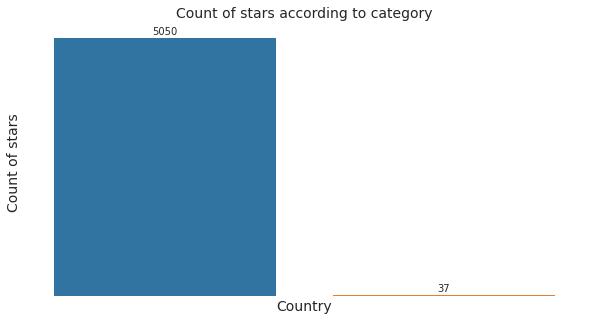

In [ ]:
# creating countplot, checking count of LABEL1 and LABEL2  in exo_train_df
plt.figure(figsize=(10,5))
sns.set_style('white')
ax=sns.countplot(x='LABEL',data=exo_train_df)
sns.despine(ax=ax,top=True, right=True, left=True, bottom=True)
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
for p in ax.patches:
    ax.annotate(p.get_height(),xy=(p.get_x()+p.get_width()/2,p.get_height())
    ,ha='center',va='bottom')# annotating the count plots.
plt.title('Count of stars according to category', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of stars ', fontsize=14)
plt.show()

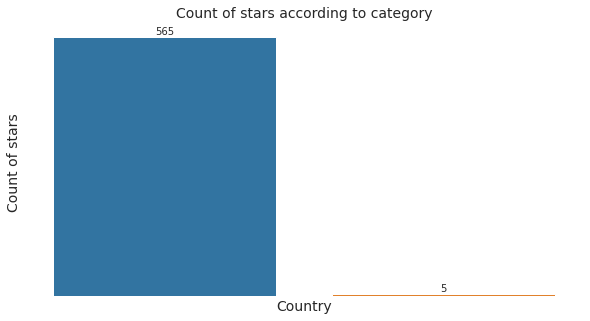

In [ ]:
# creating countplot, checking count of LABEL1 and LABEL2  in exo_test_df
plt.figure(figsize=(10,5))
ax1=sns.countplot(x='LABEL',data=exo_test_df)
sns.despine(ax=ax1,top=True, right=True, left=True, bottom=True)
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)
for p in ax1.patches:
    ax1.annotate(p.get_height(),xy=(p.get_x()+p.get_width()/2,p.get_height())
    ,ha='center',va='bottom')# annotating the count plots.
plt.title('Count of stars according to category', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of stars ', fontsize=14)
plt.show()

So we can see in both the data sets the count of label1 and label2 is:

|dataset|LABEL|Count|
|---|---|-----|
|exo_train_df|  1|5050|
|exo_train_df|  2|37|
|    |     |    |
|exo_test_df|1|565|
|exo_test_df|2|5|

Now lets check how brightness of star varies for sars having LABEL1 and for LABEL2.

**Steps to follow:**
- Fetching the data for stars.
- We will create the scatter plots and line plots for three stars labelled as `2` and three stars labelled as `1`.


In [ ]:
exo_train_df.tail()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,-4.85,3.88,16.85,26.54,36.70,36.93,38.64,57.02,59.46,78.27,101.61,75.40,115.64,130.04,148.42,190.33,203.23,234.36,272.32,299.24,279.73,344.61,-88.61,-90.03,-68.04,-59.67,-47.47,-33.73,-26.52,...,123.45,93.07,80.64,-96.47,-99.12,-79.91,-46.36,-24.50,15.23,37.81,84.92,123.14,147.16,170.86,-95.59,-87.71,-78.36,-51.03,-56.14,-36.15,-26.43,-7.16,-2.19,24.14,41.41,26.69,41.38,61.37,81.24,103.68,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,288.95,257.42,208.06,224.73,160.31,53.22,61.89,91.62,15.27,-4.70,9.75,37.20,46.91,43.00,55.41,175.08,133.64,218.98,277.05,270.98,112.98,562.45,182.81,166.41,182.28,138.97,196.53,112.61,79.70,...,-230.39,-225.14,-271.20,116.92,92.22,49.70,53.14,66.41,91.87,29.14,-83.09,-158.39,-278.08,-194.89,13.12,55.98,68.20,69.80,51.73,106.22,-1.19,165.20,83.97,59.61,42.58,86.58,84.11,103.98,88.31,36.64,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,225.68,199.75,177.53,211.27,190.35,226.61,204.55,222.45,204.51,196.45,130.41,155.12,108.21,92.93,99.46,76.12,73.34,29.25,10.76,22.68,46.29,-7.08,158.47,176.38,164.44,124.96,114.69,95.18,100.21,...,49.68,-52.30,-33.87,-14.22,-51.89,2.48,19.21,38.83,53.35,76.60,7.28,-54.26,-60.81,-14.06,16.64,29.17,35.81,28.45,48.44,47.64,37.64,77.50,61.58,18.71,22.32,60.58,25.00,7.96,-33.64,-23.42,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,-4.33,5.12,-2.24,-3.27,-7.51,-4.22,-0.82,-1.34,-6.76,-9.87,-2.18,6.43,-6.42,-6.75,-3.84,-0.56,-5.66,-4.30,-7.31,-5.81,-11.12,-4.53,4.29,-0.64,3.72,-4.25,3.12,8.85,-2.78,...,2.25,7.69,2.57,-7.28,-6.67,-8.64,-4.62,-2.87,-1.23,-3.89,-5.00,-1.68,-7.25,-0.65,0.04,-5.86,-7.83,-9.63,-12.70,-0.65,-8.66,-2.84,-8.58,-3.63,-7.44,-4.98,-3.60,-12.21,-6.65,-5.05,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55
5086,1,323.28,306.36,293.16,287.67,249.89,218.30,188.86,178.93,118.93,130.68,104.50,63.03,72.07,198.89,570.46,208.08,26.42,44.18,39.85,71.55,81.54,48.87,61.10,49.82,38.50,28.64,20.10,15.07,33.55,36.00,-29.34,-47.82,186.07,112.91,98.15,79.33,55.77,25.82,10.99,...,-32.79,-17.46,-4.60,168.11,22.56,-34.79,-0.85,-5.64,-15.34,27.73,31.34,15.93,1.88,-5.05,7.50,27.73,-22.82,-40.24,-26.11,-39.12,-26.63,31.11,24.86,42.61,30.88,17.34,-9.08,23.18,22.94,13.89,71.19,0.97,55.20,-1.63,-5.50,-25.33,-41.31,-16.72,-14.09,27.82


In [ ]:
# fetching top three rows 
star_0=exo_train_df.iloc[0,1:]
star_1=exo_train_df.iloc[1,1:]
star_2=exo_train_df.iloc[2,1:]
# fetching bottom three rows
star_5086=exo_train_df.iloc[5086,1:]
star_5085=exo_train_df.iloc[5085,1:]
star_5084=exo_train_df.iloc[5084,1:]
multiline_str='''
Data for {name} is: \n
{data}
{symbol}
'''
for i in exo_train_df.index:
    if i<3 or i>5083:
        print(multiline_str.format(name='star_'+str(i),
                         data=exo_train_df.iloc[i,1:],
                         symbol='-'*50))



Data for star_0 is: 

FLUX.1       93.85
FLUX.2       83.81
FLUX.3       20.10
FLUX.4      -26.98
FLUX.5      -39.56
             ...  
FLUX.3193    92.54
FLUX.3194    39.32
FLUX.3195    61.42
FLUX.3196     5.08
FLUX.3197   -39.54
Name: 0, Length: 3197, dtype: float64
--------------------------------------------------


Data for star_1 is: 

FLUX.1      -38.88
FLUX.2      -33.83
FLUX.3      -58.54
FLUX.4      -40.09
FLUX.5      -79.31
             ...  
FLUX.3193     0.76
FLUX.3194   -11.70
FLUX.3195     6.46
FLUX.3196    16.00
FLUX.3197    19.93
Name: 1, Length: 3197, dtype: float64
--------------------------------------------------


Data for star_2 is: 

FLUX.1       532.64
FLUX.2       535.92
FLUX.3       513.73
FLUX.4       496.92
FLUX.5       456.45
              ...  
FLUX.3193      5.06
FLUX.3194    -11.80
FLUX.3195    -28.91
FLUX.3196    -70.02
FLUX.3197    -96.67
Name: 2, Length: 3197, dtype: float64
--------------------------------------------------


Data for star_5084 is:

Now lets create line plot and scatter plots for these stars and try to understand pattern over there. 

In [ ]:
# removing LABEL column before creating plots
new_train_df=exo_train_df.iloc[:,1:]
new_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,-207.47,-154.88,-173.71,-146.56,-120.26,-102.85,-98.71,-48.42,-86.57,-0.84,-25.85,-67.39,-36.55,-87.01,-97.72,-131.59,-134.80,-186.97,-244.32,-225.76,-229.60,-253.48,-145.74,-145.74,30.47,-173.39,-187.56,-192.88,-182.76,-195.99,...,-167.69,-56.86,7.56,37.40,-81.13,-20.10,-30.34,-320.48,-320.48,-287.72,-351.25,-70.07,-194.34,-106.47,-14.80,63.13,130.03,76.43,131.90,-193.16,-193.16,-89.26,-17.56,-17.31,125.62,68.87,100.01,-9.60,-25.39,-16.51,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,-86.51,-74.97,-73.15,-86.13,-76.57,-61.27,-37.23,-48.53,-30.96,-8.14,-5.54,15.79,45.71,10.61,40.66,16.70,15.18,11.98,-203.70,19.13,19.13,19.13,19.13,19.13,17.02,-8.50,-13.87,-29.10,-34.29,-24.68,...,-36.75,-15.49,-13.24,20.46,-1.47,-0.40,27.80,-58.20,-58.20,-72.04,-58.01,-30.92,-13.42,-13.98,-5.43,8.71,1.80,36.59,-9.80,-19.53,-19.53,-24.32,-23.88,-33.07,-9.03,3.75,11.61,-12.66,-5.69,12.53,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,469.66,462.30,492.23,441.20,483.17,481.28,535.31,554.34,562.80,540.14,576.34,551.67,556.69,550.86,577.33,562.08,577.97,530.67,553.27,538.33,527.17,532.50,273.66,273.66,292.39,298.44,252.64,233.58,171.41,224.02,...,-51.09,-33.30,-61.53,-89.61,-69.17,-86.47,-140.91,-84.20,-84.20,-89.09,-55.44,-61.05,-29.17,-63.80,-57.61,2.70,-31.25,-47.09,-6.53,14.00,14.00,-25.05,-34.98,-32.08,-17.06,-27.77,7.86,-70.77,-64.44,-83.83,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,311.14,326.19,313.11,313.89,317.96,330.92,341.10,360.58,370.29,369.71,339.00,336.24,319.31,321.56,308.02,296.82,279.34,275.78,289.67,281.33,285.37,281.87,88.75,88.75,67.71,74.46,69.34,76.51,80.26,70.31,...,-2.75,14.29,-14.18,-25.14,-13.43,-14.74,2.24,-31.07,-31.07,-50.27,-39.22,-51.33,-18.53,-1.99,10.43,-1.97,-15.32,-23.38,-27.71,-36.12,-36.12,-15.65,6.63,10.66,-8.57,-8.29,-21.90,-25.80,-29.86,7.42,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,-933.30,-889.49,-888.66,-853.95,-800.91,-754.48,-717.24,-649.34,-605.71,-575.62,-526.37,-490.12,-458.73,-447.76,-419.54,-410.76,-404.10,-425.38,-397.29,-412.73,-446.49,-413.46,-1006.21,-1006.21,-973.29,-986.01,-975.88,-982.20,-953.73,-964.35,...,-694.76,-705.01,-625.24,-604.16,-668.26,-742.18,-820.55,-874.76,-874.76,-853.68,-808.62,-777.88,-712.62,-694.01,-655.74,-599.74,-617.30,-602.98,-539.29,-672.71,-672.71,-594.49,-597.60,-560.77,-501.95,-461.62,-468.59,-513.24,-504.70,-521.95,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


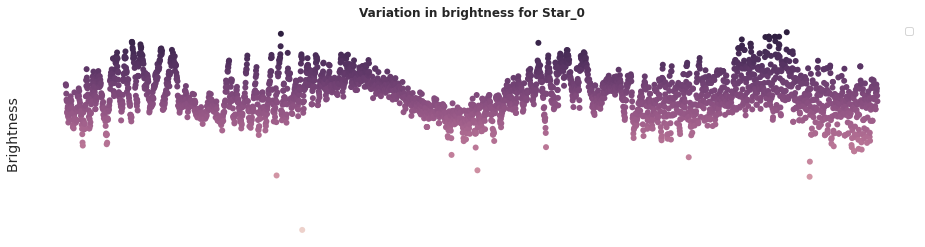

----------------------------------------------------------------------------------------------------


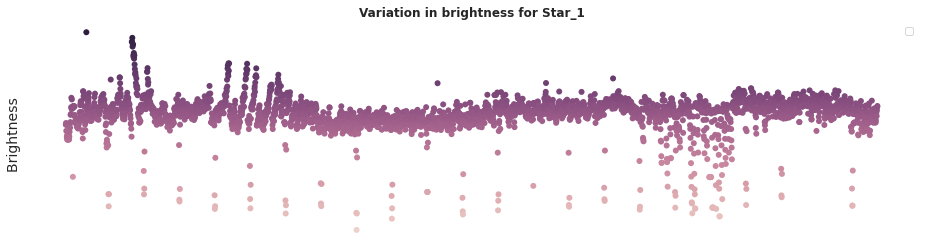

----------------------------------------------------------------------------------------------------


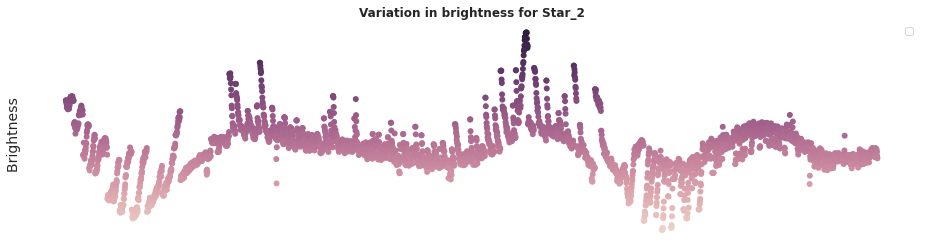

----------------------------------------------------------------------------------------------------


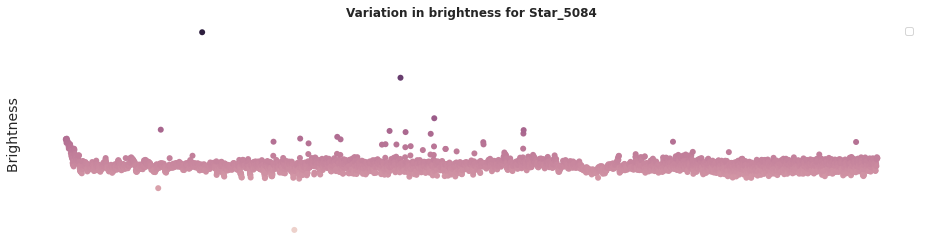

----------------------------------------------------------------------------------------------------


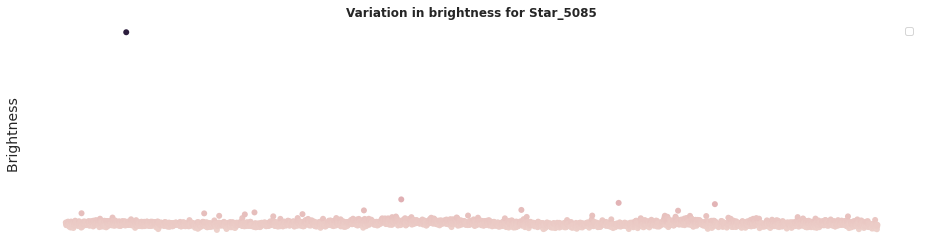

----------------------------------------------------------------------------------------------------


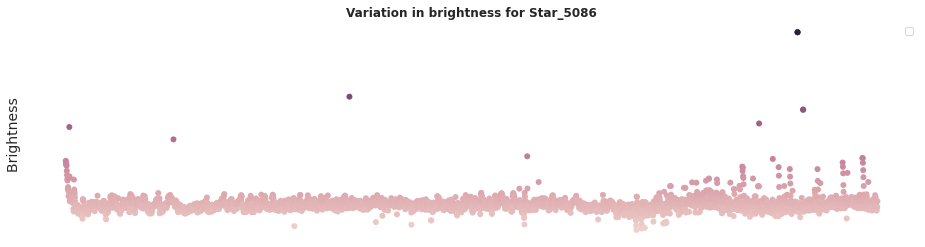

----------------------------------------------------------------------------------------------------


In [ ]:
# Creating a scatter plots  for all six stars Pandas series.
for i in exo_train_df.index:
    if i<3 or i>5083:
        plt.figure(figsize=(16, 4))
        sns.set_style('white')
        ax1=sns.scatterplot(x=np.arange(1, 3198), y=new_train_df.loc[i,:],hue=new_train_df.loc[i,:],linewidth=0)
        sns.despine(ax=ax1,top=True, right=True, left=True, bottom=True)
        plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
        plt.title('Variation in brightness for Star_'+str(i),weight='bold')
        plt.ylabel('Brightness ', fontsize=14)
        plt.legend('')
        plt.show()
        print('-'*100) 

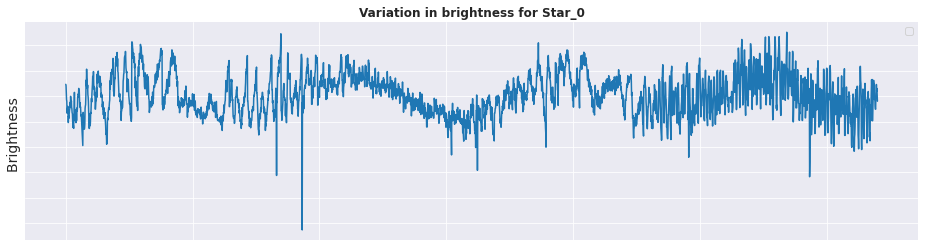

----------------------------------------------------------------------------------------------------


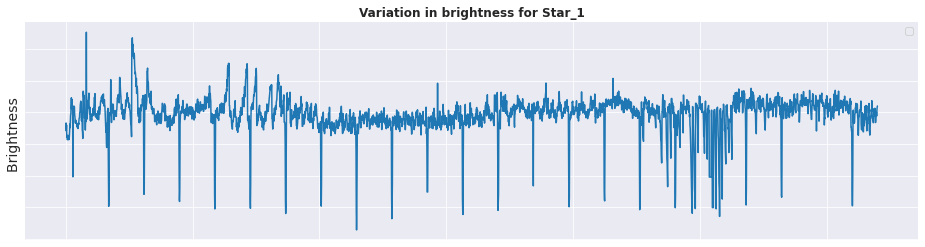

----------------------------------------------------------------------------------------------------


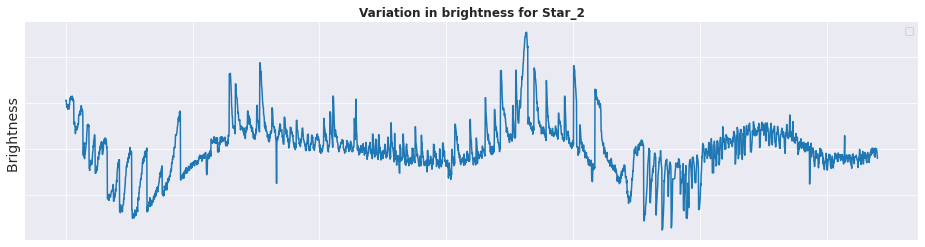

----------------------------------------------------------------------------------------------------


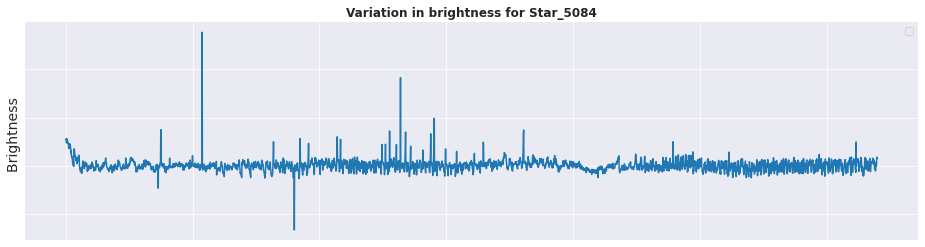

----------------------------------------------------------------------------------------------------


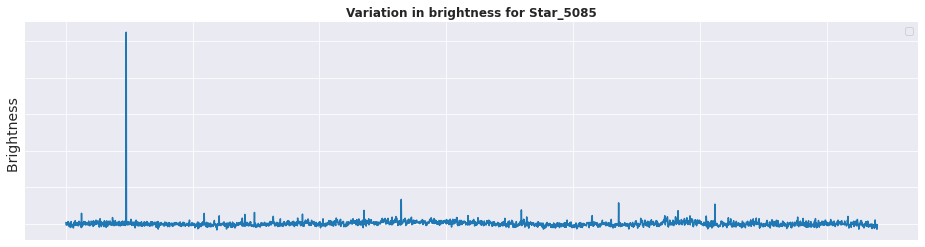

----------------------------------------------------------------------------------------------------


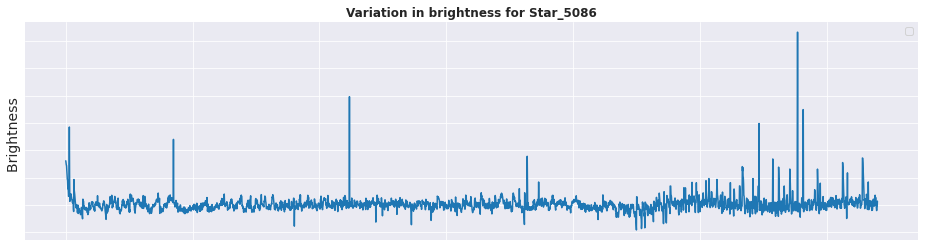

----------------------------------------------------------------------------------------------------


In [ ]:
# Creating a line plots  for all six stars Pandas series.
for i in exo_train_df.index:
    if i<3 or i>5083:
        plt.figure(figsize=(16, 4))
        sns.set_style('darkgrid')
        ax1=sns.lineplot(x=np.arange(1, 3198), y=new_train_df.loc[i,:])
        sns.despine(ax=ax1,top=True, right=True, left=True, bottom=True)
        plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
        plt.title('Variation in brightness for Star_'+str(i),weight='bold')
        plt.ylabel('Brightness ', fontsize=14)
        plt.legend('')
        plt.show()
        print('-'*100) 

## Conclusions and Insights from line plots and scatter plots: 

**Star_0 :** 
  - As we can see from the graph, there is a somewhat periodic downward peak in the brightness level recorded by the Kepler telescope for this star. This suggests that the first star in the DataFrame has at least one planet.

  - The line plot also confirms the periodic downward-peaks in the `FLUX` values.

**Star_1 :**
  - As we can see, there are consistent sudden drops in the brightness levels for the second star in the DataFrame. This suggests that the planet is orbiting its star at very high radial speed. Also, the planet could be very close to the star.


**Star_2 :**
  - Here also, we can spot a clear repetitive downward-peaks which confirms that the star has at least one planet.


**Star_5086 :**
  - As you can see, there is no clear periodic downward-peak in the brightness levels of the light emitted from the star. We cannot make a claim that the star has a planet orbiting it. 
  - There are some sudden spikes in the line plot but they exist at irregular intervals. So we cannot say for sure that the star has a planet.

**Star_5085 :**
  - There is no clear periodic downward-peak pattern in the FLUX values for the second-last star.
  - This star doesnot have any planet.

**Star_5084 :**
  - No clear periodic downward-peak pattern for this star.

**Since now we have good understanding of data lets head towards our goal i.e. Training our model**







## Step 4 -Training Model and Testing it

**Brief Discription:**
- WE will use exo_train_df for training our model.
- So that our model can classify which star has **LABEL1** and which has **LABEL2**
- The classification Algorithm we will use is           **`RandomForestClassifier`**, you can have indepth knowledge [here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python).

### 4.1 Preparing our model
Steps:
- Import the 'RandomForestClassifier' module from the 'sklearn.ensemble' library.
- Fitting the model.
  - 1.Using 'RandomForestClassifier' module.
  -  2.Using fit function and passing feature variables and target values.




In [ ]:
# Import the 'RandomForestClassifier' module from the 'sklearn.ensemble' library.
from sklearn.ensemble import RandomForestClassifier
# Extracting the feature variables and target values from the training dataset.
x_train = exo_train_df.iloc[:, 1:]
y_train = exo_train_df.iloc[:, 0] 

# Fitting the model
# 1.Using 'RandomForestClassifier' module with inputs as 'n_jobs = - 1' & 'n_estimators=50'. Store it in a variable with the name 'rf_clf'.
rf_clf = RandomForestClassifier(n_jobs=-1, n_estimators=50)
# 2.Using fit function and passing x_train and y_train as parameters.
rf_clf.fit(x_train, y_train)
# 3.'score()' function with 'x_train' and 'y_train' for checking the accuracy score of the model.
rf_clf.score(x_train, y_train)

0.9998034204835856

- We have trained our model by using exo_train_df.
- For testing it weather it is working properly or not we will use exo_test_df.

### 4.2 Testing our model on test dataset.
So we have created our model so excited to test it **;)**
- 1st we will seperate feature variables and target values in exo_test_df.
- WE will use `predict()` function and will pass feature variables inside it.
- It will give us the result of LABEL like which star has LABEL1 and which one has LABEL2.



In [ ]:
# extracting the feature variables from the test dataset.
x_test = exo_test_df.iloc[:, 1:]
y_test = exo_test_df.iloc[:, 0]


In [ ]:
# Using the 'predict()' function for predicting the result.
y_predicted = rf_clf.predict(x_test)
print('Type of y_predicted is :',type(y_predicted),'\n','-'*50)
print('predicted LABEL column values for exo_test_df:','\n',y_predicted,'\n','-'*50)
print(pd.Series(y_predicted).value_counts())

Type of y_predicted is : <class 'numpy.ndarray'> 
 --------------------------------------------------
predicted LABEL column values for exo_test_df: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1

ohhh....This is not what i have expected , it is showing that all stars are having LABEL1 but in test dataset 
`565` stars has values `1` and `5` stars has value `2`.

In this case, even though the accuracy of a prediction model is high but according to the problem statement, it is not giving the desired result.So we have to go further and have to create **`Confusion Matrix`** and **`ClassificationReoprt`** for checking whats wrong with our model.


## Step 5 - Summarizing the performance of our classification algorithm.
Let's quickly first create a confusion matrix and then will try to understand what is worng with our model.


In [ ]:
# Import the 'confusion_matrix' and 'classification_report' functions from the 'sklearn.metrics' module.
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_predicted)#Creating a confusion matrix using the 'y_test' and 'y_predicted' values.

array([[565,   0],
       [  5,   0]])

So the output we are getting is representing:


|Stars 570|Predicted 1| predicted 2|
|-----|-----------|------------|
|Actual 1| 565| 0|
|Actual 2| 5| 0|

It is representing out of 570 stars :
- In actual `565` are `1` and also predicted as `1` .
- In actual `5` are `2` but they are predicted as `1`.

Lets create **ClassificationReport** and check what is **Precision** , **Recall** and **F1-score** for our model.

In [ ]:
#Print the 'precision', 'recall' and 'f1-score' values using the 'classification_report()' function.
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Nothing has been predicted as exo planet which is why we see that Sklearn has throwed a warning that precision and F1 score is ill defined.**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
# converting y_test and y_predicted in boolean format
y_test_boolean=y_test==2
y_predicted_boolean=y_predicted==2


In [ ]:
# using ROC function fr getting false_positive_rate and true_positive_rate
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_boolean, y_predicted_boolean)

In [ ]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test_boolean, y_predicted_boolean))

roc_auc_score for DecisionTree:  0.5


AUC is approximately 0.5, model has no discrimination capacity to distinguish between positive class and negative class.


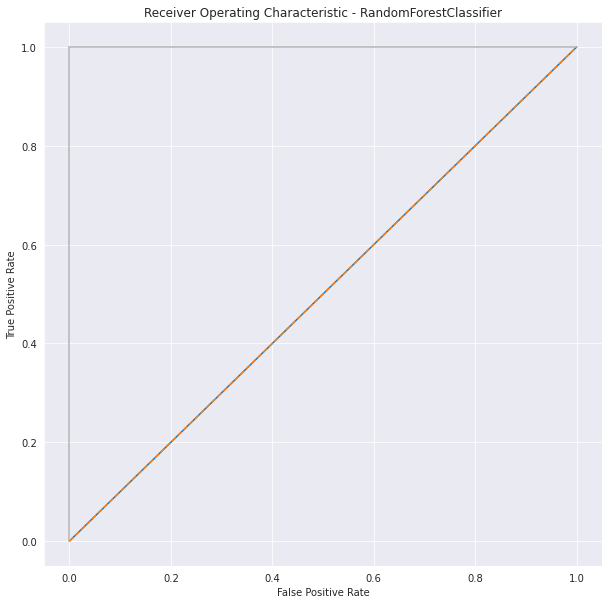

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As you can see, the `precision` and `f1-score` values are reported as `0.00` for class `2` because they are actually undefined values. 
  
Ideally, the above values for class `2` should also be close to `1.00`. Then only we can say that our prediction model is satisfactory. This shows that accuracy alone cannot tell whether a prediction model is making correct predictions or not.

We also calculated the precision, recall and f1-score values. They were undefined. Based on these three parameters, we concluded that our model needs a lot of improvement because it did not classify the stars having a planet as `2` rather it labelled every star as `1`.

Also we have created **ROC** curve which is representing the relation between false_positive_rate and true_positive_rate


## STEP 6: Data Processing (before deploying the model)



### 6.1 Data Normalization:

As you can see, the values in the `FLUX.1` column range between `-227,856.3` (minimum `FLUX.1` value) and `1,439,240` (maximum `FLUX.1` value). 
In the `FLUX.1` column, the difference in the maximum and minimum values, i.e., 

$$1,439,240 - (-227,856.3) = 1,667,096.3$$

The machine learning models are quite sensitive to the scale of data. They give more importance to the larger values while learning the properties of data. Hence, it becomes crucial for us to remove this bias by bringing down all the data-points on the same scale.




In [ ]:
# Creating a function to normalise a Pandas series using the mean normalisation method.
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

# Apply the 'mean_normalise' function on training dataset. 
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)

#Apply the 'mean_normalize()' function on the testing DataFrame.
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)


### 6.2 Apply Fast_Fourier_Transformation 

Use of FFT is that it can be used for **dimensionality reduction or feature extraction.**

**When each sample in the dataset is a signal (time series, or images, etc.), it may consist of thousands of samples. But they might actually correspond to just a few points in the Fourier domain (especially if there is some periodicity). This simplifies the problem a lot.**

You can learn more about it [here](https://www.kdnuggets.com/2020/02/fourier-transformation-data-scientist.html).



In [ ]:
#Create a function and name it 'fast_fourier_transformation()' to apply Fast Fourier Transformation on the DataFrames.
def fast_fourier_transform(star):
  fft_star = np.fft.fft(star, n=len(star))
  return np.abs(fft_star)

freq = np.fft.fftfreq(len(star_0))


In [ ]:
# Apply the 'fast_fourier_transform' function on the transposed 'norm_train_df' DataFrame.
x_fft_train_T = norm_train_df.T.apply(fast_fourier_transform, axis=0)
x_fft_train = x_fft_train_T.T

x_fft_test_T = norm_test_df.T.apply(fast_fourier_transform, axis=0)
x_fft_test = x_fft_test_T.T

In [ ]:
#Apply the 'fast_fourier_transform()' function on the transposed 'norm_test_df' DataFrame.
x_fft_test_T = norm_test_df.T.apply(fast_fourier_transform)
x_fft_test = x_fft_test_T.T
x_fft_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,5.126298e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,7.981027,5.287100,12.370191,8.395335,8.553800,4.309482,7.490986,10.080278,8.053845,4.251019,4.045196,4.938889,4.448891,6.867339,8.095095,3.053256,8.820256,7.712783,10.136966,8.355963,5.958016,9.640472,10.699294,6.819834,8.876643,6.950734,4.831057,5.636601,1.145892,6.599601,...,5.130651,6.599601,1.145892,5.636601,4.831057,6.950734,8.876643,6.819834,10.699294,9.640472,5.958016,8.355963,10.136966,7.712783,8.820256,3.053256,8.095095,6.867339,4.448891,4.938889,4.045196,4.251019,8.053845,10.080278,7.490986,4.309482,8.553800,8.395335,12.370191,5.287100,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,3.980211e-14,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,9.883983,34.277524,72.281651,24.528767,4.534815,12.675589,15.834146,18.067399,13.654873,13.552821,21.800119,9.411672,0.903089,4.953368,4.798063,15.421308,8.244732,13.001946,4.563079,6.663124,1.724316,21.652624,15.739841,15.593781,5.901540,14.276665,11.181695,3.118744,8.458737,15.851903,...,23.188351,15.851903,8.458737,3.118744,11.181695,14.276665,5.901540,15.593781,15.739841,21.652624,1.724316,6.663124,4.563079,13.001946,8.244732,15.421308,4.798063,4.953368,0.903089,9.411672,21.800119,13.552821,13.654873,18.067399,15.834146,12.675589,4.534815,24.528767,72.281651,34.277524,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,2.581991e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,7.742408,9.010245,11.050290,15.234191,14.793277,7.146753,9.825702,4.178862,17.689056,5.301253,0.838855,5.453207,8.119005,6.874388,4.943019,4.889046,9.891267,2.335758,0.634175,9.118097,10.735174,15.531430,17.775452,5.374194,13.646464,2.894904,5.909334,6.081466,17.896810,5.259022,...,2.926198,5.259022,17.896810,6.081466,5.909334,2.894904,13.646464,5.374194,17.775452,15.531430,10.735174,9.118097,0.634175,2.335758,9.891267,4.889046,4.943019,6.874388,8.119005,5.453207,0.838855,5.301253,17.689056,4.178862,9.825702,7.146753,14.793277,15.234191,11.050290,9.010245,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,4.574132e-14,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,16.668561,18.211277,3.796749,14.614066,12.865043,15.193305,4.960198,4.656041,5.049559,20.808633,19.072745,17.983037,55.100406,7.533258,3.688735,9.832614,2.530170,2.220069,6.144516,2.746874,6.569176,16.597156,11.903331,4.207380,7.016571,6.786262,14.311839,7.601058,3.766341,15.346786,...,3.619052,15.346786,3.766341,7.601058,14.311839,6.786262,7.016571,4.207380,11.903331,16.597156,6.569176,2.746874,6.144516,2.220069,2.530170,9.832614,3.688735,7.533258,55.100406,17.983037,19.072745,20.808633,5.049559,4.656041,4.960198,15.193305,12.865043,14.614066,3.796749,18.211277,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,2.879381e-14,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,5.167375,6.483161,7.324964,6.815963,5.151272,11.916397,16.422263,15.649583,10.678073,8.039292,5.185997,1.507619,1.

Lets create some plot after applying FFT on our test data set.

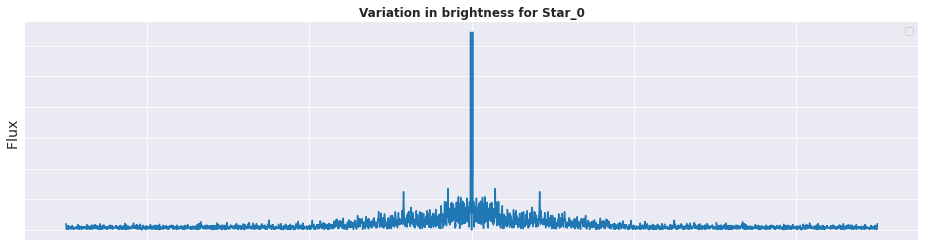

----------------------------------------------------------------------------------------------------


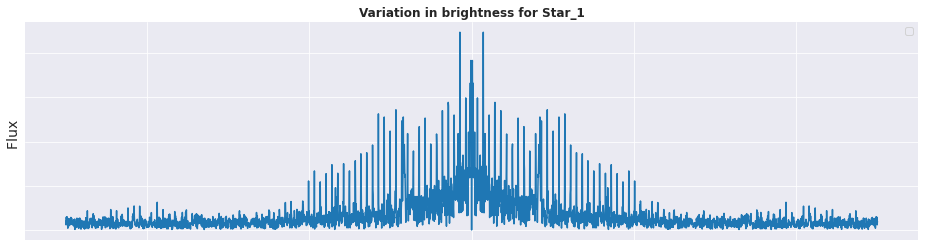

----------------------------------------------------------------------------------------------------


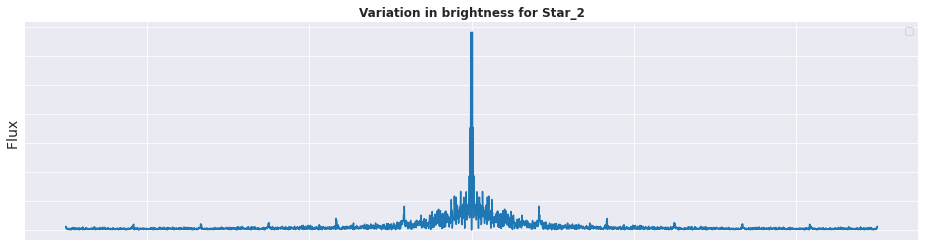

----------------------------------------------------------------------------------------------------


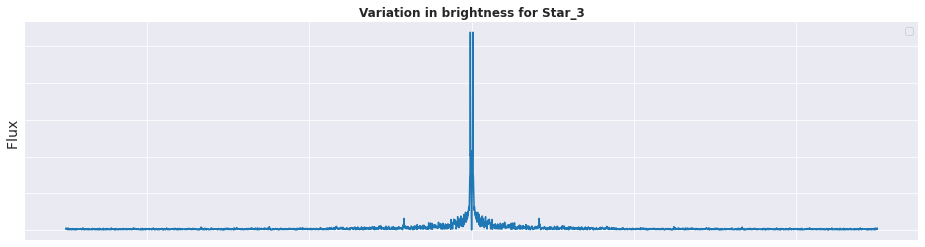

----------------------------------------------------------------------------------------------------


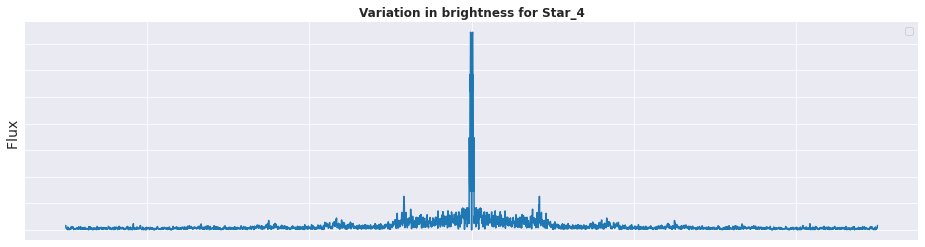

----------------------------------------------------------------------------------------------------


In [ ]:
for i in x_fft_train.index:
    if i<5:
        plt.figure(figsize=(16, 4))
        sns.set_style('darkgrid')
        ax1=sns.lineplot(x=freq, y=x_fft_train.iloc[i,:])
        sns.despine(ax=ax1,top=True, right=True, left=True, bottom=True)
        plt.tick_params(top=False, bottom=False, left=False, right=False,labelleft=False, labelbottom=False)
        plt.title('Variation in brightness for Star_'+str(i),weight='bold')
        plt.ylabel('Flux ', fontsize=14)
        plt.legend('')
        plt.show()
        print('-'*100) 

So the graphs we are getting above is by converting Time-domain data to frequency domain data and we have visualize it for those Stars which are having planet

In [ ]:
# Apply the 'SMOTE()' function to balance the training data.
from imblearn.over_sampling import SMOTE
# Call the 'SMOTE()' function with 'ratio=1' as input and store it in the 'smote' variable.
smote = SMOTE(ratio=1)
# Call the 'fit_sample()' function with 'x_fft_train' and 'y_train' datasets as inputs.
x_fft_train_res, y_fft_train_res = smote.fit_sample(x_fft_train, y_train) # The term 'res' stands for 'resampled'.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Deploy the XGBoost Classifier model to detect the stars having a planet.
import xgboost as xg
model = xg.XGBClassifier()
model.fit(x_fft_train_res, y_fft_train_res)

# Make predictions on test data by calling the 'predict()' function with 'x_fft_test' data as input.
y2_pred = model.predict(np.array(x_fft_test))
y2_pred

array([2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Create the confusion matrix using the 'y_test' and 'y2_pred' values as inputs.
cm2 = confusion_matrix(y_test, y2_pred)
print(cm2)
print('\n')
print(classification_report(y_test, y2_pred))

[[565   0]
 [  2   3]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570



In [ ]:
y2_pred_boolean=y2_pred==2

In [ ]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_boolean, y2_pred_boolean)

[0. 0. 1.]
[0.  0.6 1. ]


In [ ]:
print('roc_auc_score for XGBoost Classifier : ', roc_auc_score(y_test_boolean, y2_pred_boolean))

roc_auc_score for XGBoost Classifier :  0.8


AUC is 0.8, it means there is 80% chance that model will be able to distinguish between positive class and negative class.

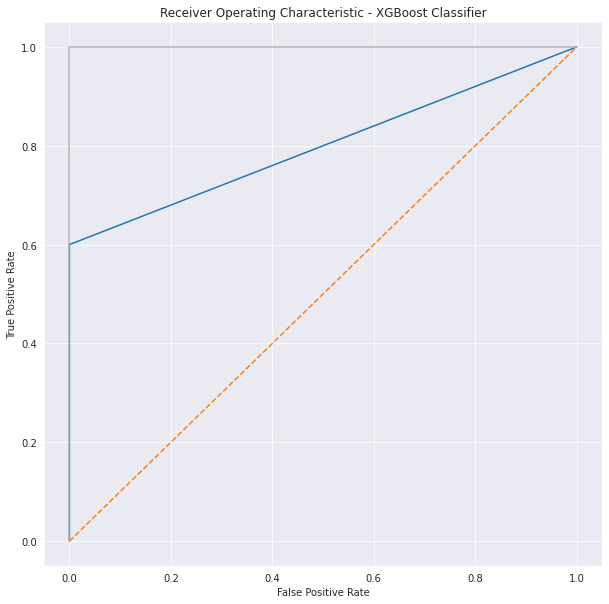

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBoost Classifier')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As you can see, the precision, recall and f1-scores for the class `2` values are quite high. **The closer they are to ONE, the better is the classification model.** 

This is not the best classification model, but it is a fairly good one. So, we don't have to further process the data. The three data processing activities, i.e., mean normalisation, Fourier Transformation and Oversampling are good enough for this problem statement wherein we hunt the exoplanets in space **:)**

